In [7]:
using Plots, LinearAlgebra

In [8]:
include("../src/banded_matrix.jl")
include("../src/spline_1d.jl")
include("../src/spline_interpolator_1d.jl")

compute_interpolant! (generic function with 1 method)

In [9]:
function f( x; d=0 ) 
    
        k = 2π
    
        k^d .* cos.( 0.5*π*d .+ k*x )
    
end

f (generic function with 1 method)

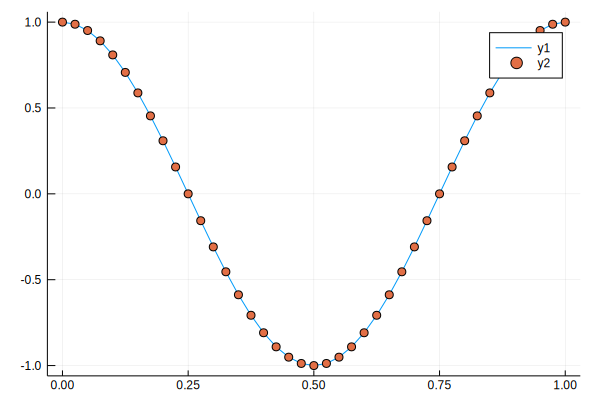

In [26]:
xmin, xmax = 0.0, 1.0
ncells = 40

degree = 5
obj =  InterpolatorSpline1D( degree, xmin, xmax, ncells )

gtau = map( f, obj.tau ) 

derivs_left = zeros(Float64, degree÷2)
s = Int64(iseven(degree))
for j = 1:degree÷2
    derivs_left[j] = f( xmin; d=j-s )
end

derivs_right = zeros(Float64, degree÷2)
for j = 1:degree÷2
    derivs_right[j] = f( xmax; d=j-s )
end

compute_interpolant!( obj, gtau, derivs_left, derivs_right )

error = 0.0
for (i, tau) in enumerate(obj.tau)
    delta = gtau[i] - eval_value( obj.bspl, tau )
    error += abs( delta )
end

plot(obj.tau, gtau)
scatter!(obj.tau, map(f,obj.tau))

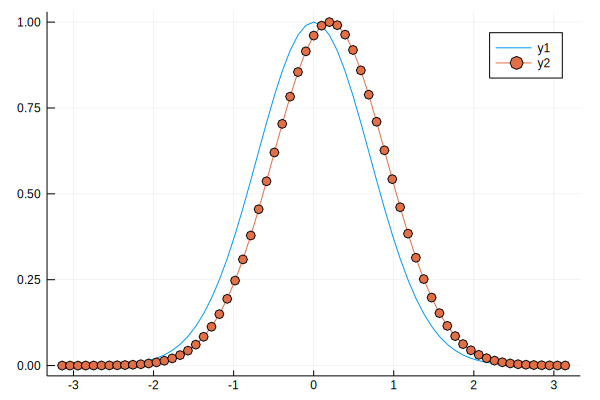

In [25]:
xmin, xmax, ncells = -π, π, 64
x = range(xmin, stop=xmax, length=ncells+1) |> collect
degree = 5
interp =  InterpolatorSpline1D( degree, xmin, xmax, ncells )

df = exp.(-x.^2)
derivs_left = zeros(Float64, degree÷2)
derivs_right = zeros(Float64, degree÷2)
compute_interpolant!( interp, df, derivs_left, derivs_right )

plot(x, df)
alpha = 0.2
for (i, px) in enumerate(x .- alpha)
    if px < xmin || px > xmax
        df[i] = -0.0
    else
        df[i] = eval_value( interp.bspl, px )
    end
end
plot!(x, df; marker=:o)